In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import optimize

# Deterministic

In [30]:
def SIR(v, t, beta, gamma):
    dSdt = -beta * v[0] * v[1]
    dIdt = beta * v[0] * v[1] - gamma * v[1]
    dRdt = gamma * v[1]
    return [dSdt, dIdt, dRdt]

In [31]:
def s_inf_func(x, rho, const):
    return rho * np.log(x) - x + const

In [32]:
def SIR_plot(S_0 = 999, I_0 = 1, R_0 = 0, t_max = 30, dt = 0.001, Nbeta = 1.5, gamma = 1):
  ini_state = [S_0,I_0,R_0] #[S[0], I[0], R[0]]
  N_total = S_0+I_0+R_0
  #numerical integration
  times = np.arange(0, t_max, dt)
  beta = Nbeta / N_total
  args  = (beta, gamma)

  #R0
  R0 = N_total * beta *(1/gamma)
  print("Reproduction Number: ", R0)

  result = odeint(SIR, ini_state, times, args)
  rho = gamma / beta
  const = I_0 + S_0 - rho * np.log(S_0)
  theo_I_max = - rho + rho * np.log(rho) + const
  theo_S_inf = optimize.fsolve(s_inf_func, 20, (rho, const))
  #plot
  plt.plot(times,result)
  plt.hlines(theo_I_max, 0, t_max, colors='orange', linestyle='dashed')
  plt.hlines(theo_S_inf, 0, t_max, colors='blue', linestyle='dashed')
  plt.legend(['Susceptible','Infectious', 'Recovered', "$max(I)$(Theoretical)", "$S_{\infty}$(Theoretical)"])

Reproduction Number:  1.5


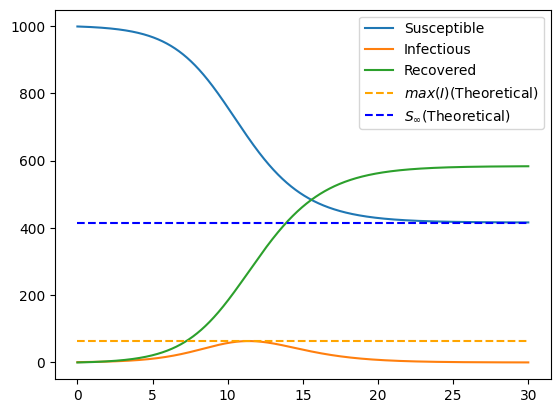

In [33]:
SIR_plot()

---

# Stochastic

In [3]:
tau = 1.5 / 1000
gamma = 1

In [4]:
def one_simulation():
    states = [[999, 1, 0]]
    ts = [0]
    t_max = 30
    t = 0
    state = states[-1]


    while t < t_max:
        state = states[-1]
        t = ts[-1]
        T = state[0] * state[1] * tau + state[1] * gamma
        t_next = random.expovariate(T)
        t = t + t_next
        if random.random() < state[1] * gamma / T:
            new_state = [state[0], state[1] - 1, state[2] + 1]
        else:
            new_state = [state[0] - 1, state[1] + 1, state[2]]
        if new_state[1] == 0:
            break
        ts.append(t)
        states.append(new_state)
    
    s = [state[0] for state in states]
    i = [state[1] for state in states]
    r = [state[2] for state in states]
    
    return s, i, r, ts

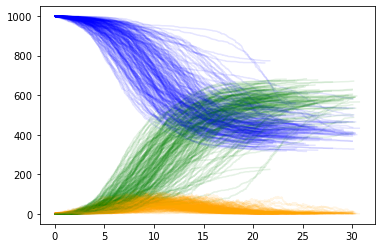

In [18]:
for j in range(1000):
    s, i, r, ts = one_simulation()
    if max(ts) > 20:
        plt.plot(ts, s, alpha = 0.1, color = "blue")
        plt.plot(ts, i, alpha = 0.1, color = "orange")
        plt.plot(ts, r, alpha = 0.1, color = "green")
        
plt.savefig("stochastic_sir")

In [43]:
S = []
I = []
R = []
Times = []

In [51]:
for j in range(10000):
    s, i, r, ts = one_simulation()
    S.append(s)
    I.append(i)
    R.append(r)
    Times.append(ts)
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616


4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459


5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110


7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106


9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999


In [56]:
pd.to_pickle(S, '../data/SIR/stochastic/S.pkl')
pd.to_pickle(I, '../data/SIR/stochastic/I.pkl')
pd.to_pickle(R, '../data/SIR/stochastic/R.pkl')
pd.to_pickle(Times, '../data/SIR/stochastic/time.pkl')

In [42]:
ts

[0,
 0.3105159304402651,
 0.40356434747749503,
 0.48792464310176464,
 0.9629964199529452,
 1.0304687802366508,
 1.0328356237260317,
 1.2591084956428045,
 1.3505626344300246,
 1.3938648308072572,
 1.5831788335346098,
 1.6375863765580714,
 1.9546040164985183,
 2.0317088672570303,
 2.082967961854461,
 2.3468882053942712,
 2.4109234735027787,
 2.417206022828281,
 2.4615701960310354,
 2.537509398016383,
 2.586188802594021,
 2.6440041161814833,
 2.652108135771017,
 2.7433371176585823,
 2.846521166235336,
 3.014852390599176,
 3.2089949793989883,
 3.5842797484458493,
 3.5983063149919614,
 3.606015708689321,
 3.6401416802607938,
 3.661281550167755,
 3.6988211328842757,
 3.702360257824854,
 3.729104870392455,
 3.737637756808326,
 3.843837437239665,
 3.8444152537833767,
 3.858092330711115,
 4.067956555997989,
 4.078867071312568,
 4.1914122863336996,
 4.237650061087125,
 4.2378497275482685,
 4.568898751185621,
 4.676948601976291,
 4.92709242519382,
 5.000690904358576,
 5.095551777504237,
 5.107631

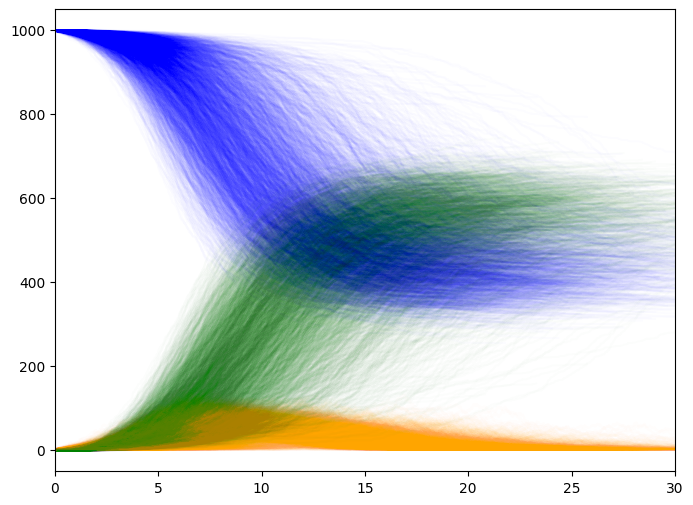

In [59]:
plt.figure(figsize=(8, 6))
for j in range(10000):
    plt.xlim(0,30)
    plt.plot(Times[j], S[j], alpha = 0.01, color = "blue")
    plt.plot(Times[j], I[j], alpha = 0.01, color = "orange")
    plt.plot(Times[j], R[j], alpha = 0.01, color = "green")
plt.savefig("../figures/SIR/stochastic/stochastic_sir")

In [23]:
rho = gamma / tau
const = 1 + 999 - rho * np.log(999)
theo_I_max = - rho + rho * np.log(rho) + const
theo_S_inf = optimize.fsolve(s_inf_func, 20, (rho, const))[0]
theo_R_inf = 1000 - theo_S_inf

In [24]:
s_inf =[s[-1] for s in S]
r_inf = [r[-1] for r in R]

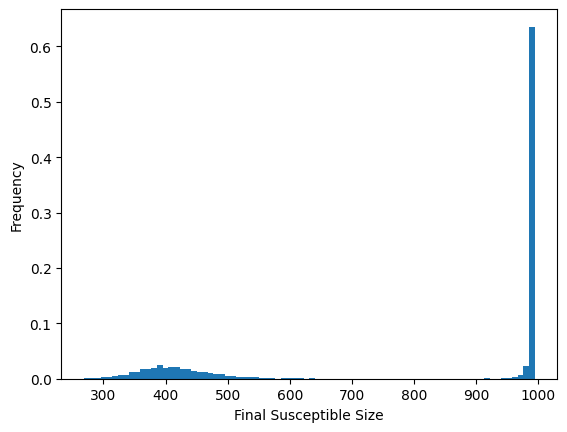

In [61]:
s_hist, s_edges = np.histogram(s_inf, density = True, bins = 80)
w_s = s_edges[1] - s_edges[0]
s_hist = s_hist * w_s
plt.bar(s_edges[:-1], s_hist, w_s)
plt.xlabel("Final Susceptible Size")
plt.ylabel("Frequency")
plt.savefig("../figures/SIR/stochastic/final_S_distribution")

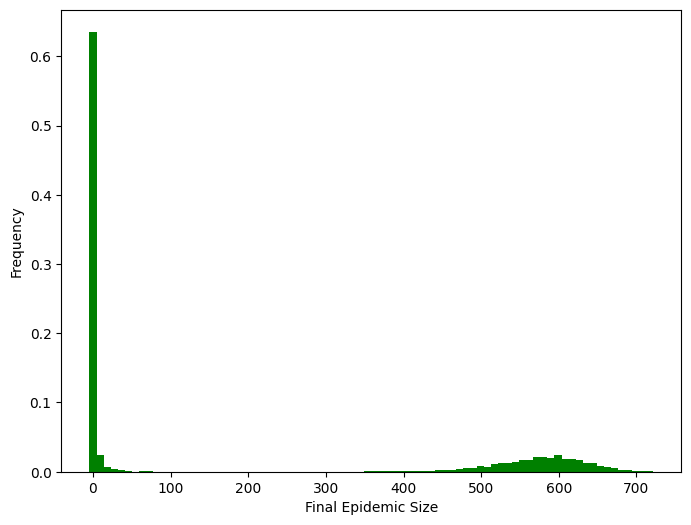

In [60]:
r_hist, r_edges = np.histogram(r_inf, density = True, bins = 80)
w_r = r_edges[1] - r_edges[0]
r_hist = r_hist * w_r
plt.figure(figsize=(8, 6))
plt.plot(facecolor = "white")
plt.bar(r_edges[:-1], r_hist, w_r, color = "green")
plt.xlabel("Final Epidemic Size")
plt.ylabel("Frequency")
plt.savefig("../figures/SIR/stochastic/final_R_distribution")

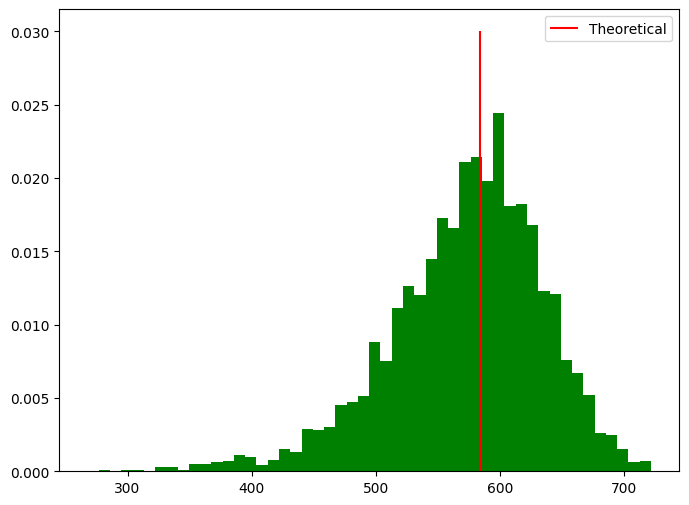

In [62]:
plt.figure(figsize=(8, 6))
plt.bar(r_edges[30:-1], r_hist[30:], w_r, color = "green")
plt.vlines(theo_R_inf, 0, 0.03, color = "red", label = "Theoretical")
plt.legend()
plt.savefig("../figures/SIR/stochastic/final_R_distribution_small")

---

In [4]:
def tau_one_simulation(tau_var):
    states = [[999, 1, 0]]
    ts = [0]
    t_max = 30
    t = 0
    state = states[-1]


    while t < t_max:
        state = states[-1]
        t = ts[-1]
        T = state[0] * state[1] * tau_var + state[1] * gamma
        t_next = random.expovariate(T)
        t = t + t_next
        if random.random() < state[1] * gamma / T:
            new_state = [state[0], state[1] - 1, state[2] + 1]
        else:
            new_state = [state[0] - 1, state[1] + 1, state[2]]
        if new_state[1] == 0:
            break
        ts.append(t)
        states.append(new_state)
    
    s = [state[0] for state in states]
    i = [state[1] for state in states]
    r = [state[2] for state in states]
    
    return s, i, r, ts

In [3]:
taus = np.arange(0.8, 2.0 , 0.001)

In [ ]:
prob_list = []

for tau in taus:
    print(tau)
    S = []
    I = []
    R = []
    ts = []
    count = 0
    for j in range(10000):
        s, i, r, ts = tau_one_simulation(tau/1000)
        S.append(s)
        I.append(i)
        R.append(r)
   
    for s in S:
        count += s[-1] > 900
    prob_list.append(count/len(S))

In [ ]:
plt.plot(taus, prob_list, marker = ".")
plt.xlabel(r"$\tau$ (/1000)")
plt.ylabel("Probability")
plt.savefig("../figures/SIR/stochastic/Probability_of_Extinction")

In [ ]:
taus2 = np.arange(0.8, 2.0 , 0.1)

In [ ]:
plt.figure(figsize=(45, 30))
for k in range(len(taus2)):
    tau = taus2[k]
    S = []
    I = []
    R = []
    ts = []
    count = 0
    for j in range(10000):
        s, i, r, ts = tau_one_simulation(tau/1000)
        S.append(s)
        I.append(i)
        R.append(r)
        
    r_inf = [r[-1] for r in R]
    r_hist, r_edges = np.histogram(r_inf, density = True, bins = 80)
    w_r = r_edges[1] - r_edges[0]
    r_hist = r_hist * w_r
    plt.subplot(3, 4, k+1)
    plt.plot(facecolor = "white")
    plt.xlim(-15, 850)
    plt.ylim(0, 0.8)
    plt.bar(r_edges[:-1], r_hist, w_r, color = "green")
    plt.title(r"$\tau={:.1f} /N$".format(tau))
    plt.xlabel("Final Epidemic Size")
    plt.ylabel("Frequency")
    plt.savefig('../figures/SIR/stochastic/tau_fin_epi_size_relationship')